# Property Price Prediction Regression Project

# Load Modules/libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading or reading the dataset

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\CAPSTONE PROJECT\Property_data.csv")

In [3]:
df.head()

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Get Brief Information on dataset

In [4]:
print('Shape of Dataset:', df.shape)

Shape of Dataset: (1460, 81)


In [5]:
## To view all the columns and its contents, we will execute below code

pd.set_option("display.max_columns", None)

In [6]:
df.head()

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,Orientation,Grade,Neighborhood,Condition1,Condition2,BldgType,PropertyStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Roof1Material,Roof2Material,ExteriorCladdingType,ExteriorCladdingArea,ExterQual,ExterCond,PropertyFooting,BsmntFinish,BsmntMaintenance,BsmntVisibility,BsmntFinRat1,BsmntFinSty1,BsmntFinQual1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,Heating,HeatingEfficiency,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,KitchenQual,CntRmsUpLev,Functional,CntFireplaces,QualFireplace,BasementType,BasementYrBlt,BasementFinish,BasementCars,BasementSqFootage,BasementQual,BasementCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
## printing all columns of the dataframe to view
df.columns

Index(['PropertyID', 'PropertyClass', 'PropertyZone', 'PropertyFrontage',
       'PropertySize', 'Street', 'Alley', 'PropertyShape', 'Elevation',
       'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'PropertyStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material',
       'Roof2Material', 'ExteriorCladdingType', 'ExteriorCladdingArea',
       'ExterQual', 'ExterCond', 'PropertyFooting', 'BsmntFinish',
       'BsmntMaintenance', 'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinSty1',
       'BsmntFinQual1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', 'Heating',
       'HeatingEfficiency', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1',
       'Bath2', 'BedroomUpLev', 'KitchenUpLev', 'KitchenQual', 'CntRmsUpLev',
       'Functional', 'CntFireplaces', 'QualFireplace', 'BasementType',
       'BasementYrBlt

In [8]:
df["BasementFinish"].value_counts()

BasementFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [9]:
## unique value checking for each column
columns=df.select_dtypes(include=['object', 'int64', 'float64']).columns
for col in columns:
    print(f'UNIQUE VALUES OF {col}:', df[col].unique())


UNIQUE VALUES OF PropertyID: [   1    2    3 ... 1458 1459 1460]
UNIQUE VALUES OF PropertyClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
UNIQUE VALUES OF PropertyZone: ['RL' 'RM' 'C (all)' 'FV' 'RH']
UNIQUE VALUES OF PropertyFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
UNIQUE VALUES OF PropertySize: [ 8450  9600 11250 ... 17217 13175  9717]
UNIQUE VALUES OF Street: ['Pave' 'Grvl']
UNIQUE VALUES OF Alley: [nan 'Grvl' 'Pave']
UNIQUE VALUES OF Prop

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 91 non-null     object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   object 
 15  BldgType             

In [11]:
##separating the int features

int_features = df.select_dtypes(include=["int64"]).columns
print("Total number of integer features:", int_features.shape[0])
print ("Integer feature names:" , int_features.tolist())

Total number of integer features: 35
Integer feature names: ['PropertyID', 'PropertyClass', 'PropertySize', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmntFinSty1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1', 'Bath2', 'BedroomUpLev', 'KitchenUpLev', 'CntRmsUpLev', 'CntFireplaces', 'BasementCars', 'BasementSqFootage', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AddVal', 'SaleMon', 'SaleYr', 'PropPrice']


In [12]:
##separating float features
float_features = df.select_dtypes(include=["float64"]).columns
print("Total number of floating features:", float_features.shape[0])
print ("Floating feature names:" , float_features.tolist())

Total number of floating features: 3
Floating feature names: ['PropertyFrontage', 'ExteriorCladdingArea', 'BasementYrBlt']


In [13]:
##separating categorical features

categorical_features=df.select_dtypes(include=["object"]).columns
print("Total number of categorical features:", categorical_features.shape[0])
print ("Categorical feature names:" , categorical_features.tolist())

Total number of categorical features: 43
Categorical feature names: ['PropertyZone', 'Street', 'Alley', 'PropertyShape', 'Elevation', 'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'PropertyStyle', 'RoofStyle', 'RoofMatl', 'Roof1Material', 'Roof2Material', 'ExteriorCladdingType', 'ExterQual', 'ExterCond', 'PropertyFooting', 'BsmntFinish', 'BsmntMaintenance', 'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinQual1', 'Heating', 'HeatingEfficiency', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'QualFireplace', 'BasementType', 'BasementFinish', 'BasementQual', 'BasementCond', 'PavedDrive', 'PoolQC', 'BoundaryFeatures', 'AddFeatures', 'SaleType', 'SaleCondn']


# Get the Statistical information of Numerical Features

In [14]:
df.describe()

,PropertyID,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExteriorCladdingArea,BsmntFinSty1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,CntRmsUpLev,CntFireplaces,BasementYrBlt,BasementCars,BasementSqFootage,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,PropPrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
df.describe().shape

(8, 38)

# Handling Missing Value

# Visualize null/missing value

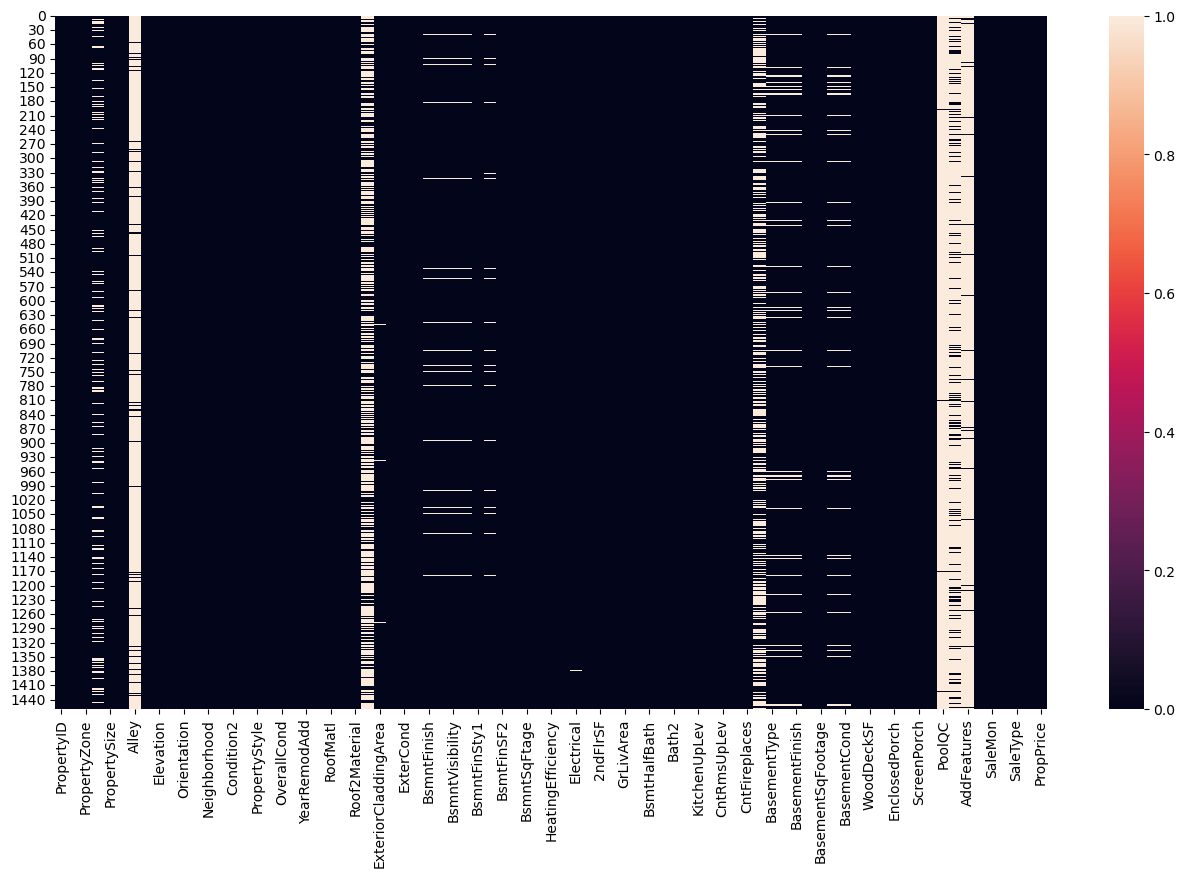

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.show()

# Get the null value percentage for every feature

In [17]:
#set index as ID column
df = df.set_index("PropertyID")

In [18]:
null_count = df.isnull().sum()
null_count

PropertyClass         0
PropertyZone          0
PropertyFrontage    259
PropertySize          0
Street                0
                   ... 
SaleMon               0
SaleYr                0
SaleType              0
SaleCondn             0
PropPrice             0
Length: 80, dtype: int64

In [19]:
null_percent = df.isnull().sum()/df.shape[0] * 100
null_percent

PropertyClass        0.000000
PropertyZone         0.000000
PropertyFrontage    17.739726
PropertySize         0.000000
Street               0.000000
                      ...    
SaleMon              0.000000
SaleYr               0.000000
SaleType             0.000000
SaleCondn            0.000000
PropPrice            0.000000
Length: 80, dtype: float64

# Drop Columns/Features

As per observation, we will not drop any feature from dataset

In [20]:
"As per domain knowledge we will not drop those features, instead of None value we will add a constant NA."

miss_value_50_percent=null_percent[null_percent>50]
miss_value_50_percent

Alley                   93.767123
ExteriorCladdingType    59.726027
PoolQC                  99.520548
BoundaryFeatures        80.753425
AddFeatures             96.301370
dtype: float64

In [21]:
df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [22]:
"As per domain knowledge we will not drop QualFireplace features, instead of None value we will add a constant NA."

miss_value_20_50_percent=null_percent[(null_percent>20) & (null_percent<51)]
miss_value_20_50_percent

QualFireplace    47.260274
dtype: float64

In [23]:
"As per domain knowledge we will not drop those features, instead of None value we will add a constant NA"

miss_value_5_20_percent=null_percent[(null_percent>5) & (null_percent<21)]
miss_value_5_20_percent

PropertyFrontage    17.739726
BasementType         5.547945
BasementYrBlt        5.547945
BasementFinish       5.547945
BasementQual         5.547945
BasementCond         5.547945
dtype: float64

In [24]:
df["PropertyFrontage"].value_counts()

PropertyFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

<Axes: ylabel='PropertyID'>

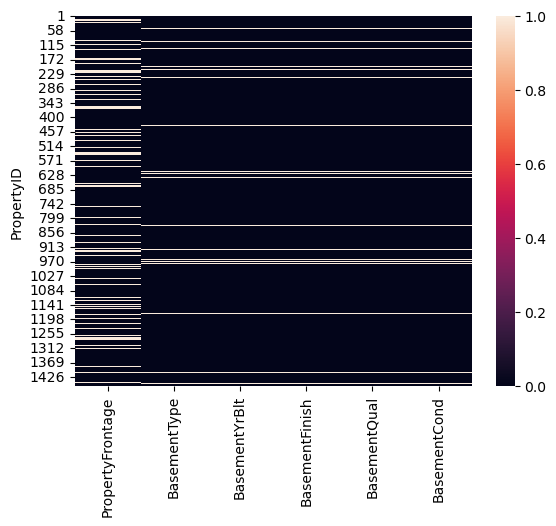

In [25]:
##By watching the below heatmap we can see that 5% of data is missing in those columns because there are properties which dont have basement at all.""

sns.heatmap(df[miss_value_5_20_percent.keys()].isnull())

# Missing Value Imputation

In [26]:
missing_value_feature = null_percent[null_percent>0]
print ("Total missing value features = ", len(missing_value_feature))

Total missing value features =  19


In [27]:
missing_value_feature

PropertyFrontage        17.739726
Alley                   93.767123
ExteriorCladdingType    59.726027
ExteriorCladdingArea     0.547945
BsmntFinish              2.534247
BsmntMaintenance         2.534247
BsmntVisibility          2.602740
BsmntFinRat1             2.534247
BsmntFinQual1            2.602740
Electrical               0.068493
QualFireplace           47.260274
BasementType             5.547945
BasementYrBlt            5.547945
BasementFinish           5.547945
BasementQual             5.547945
BasementCond             5.547945
PoolQC                  99.520548
BoundaryFeatures        80.753425
AddFeatures             96.301370
dtype: float64

In [28]:
categorical_na_features = missing_value_feature[missing_value_feature.keys().isin(categorical_features)]
print("Total number of categorical missing features=", len(categorical_na_features))
categorical_na_features

Total number of categorical missing features= 16


Alley                   93.767123
ExteriorCladdingType    59.726027
BsmntFinish              2.534247
BsmntMaintenance         2.534247
BsmntVisibility          2.602740
BsmntFinRat1             2.534247
BsmntFinQual1            2.602740
Electrical               0.068493
QualFireplace           47.260274
BasementType             5.547945
BasementFinish           5.547945
BasementQual             5.547945
BasementCond             5.547945
PoolQC                  99.520548
BoundaryFeatures        80.753425
AddFeatures             96.301370
dtype: float64

In [29]:
int_na_features = missing_value_feature[missing_value_feature.keys().isin(int_features)]
print("Total number of integer missing features=", len(int_na_features))
int_na_features

Total number of integer missing features= 0


Series([], dtype: float64)

In [30]:
float_na_features = missing_value_feature[missing_value_feature.keys().isin(float_features)]
print("Total number of float missing features=", len(float_na_features))
float_na_features

Total number of float missing features= 3


PropertyFrontage        17.739726
ExteriorCladdingArea     0.547945
BasementYrBlt            5.547945
dtype: float64

In [31]:
##backup of original data

df_new=df.copy()
df_new.shape

(1460, 80)

# Handling Alley=93.767123


In [32]:
## In Alley column there are around 93% of missing values.
## Let us impute the missing values

df_new['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [33]:
df_new["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [243]:
## we can see that in Alley the missing value is not exactly the missing value, but it is 'nan' value that means there are some properties which do not have alley access.
## so we will impute the nan value with the constant 'NA'
alley_const = "NA"
df_new["Alley"].replace(np.nan, alley_const, inplace=True)
df_new["Alley"].isnull().sum()

0

In [35]:
df_new['Alley'].unique()

array(['NA', 'Grvl', 'Pave'], dtype=object)

In [36]:
df_new["Alley"].value_counts()

Alley
NA      1369
Grvl      50
Pave      41
Name: count, dtype: int64

Text(0.5, 1.0, 'New Data Distribution')

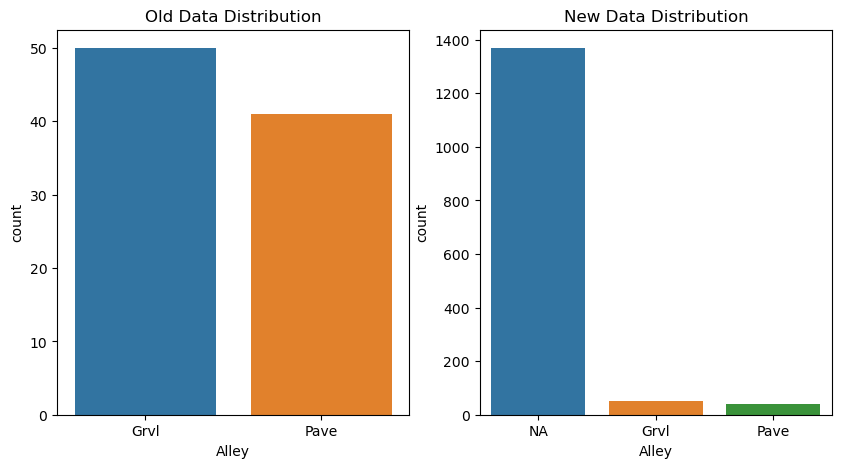

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.countplot(x='Alley', data=df, ax=ax1)
ax1.set_title("Old Data Distribution")

sns.countplot(x='Alley', data=df_new, ax=ax2)
ax2.set_title("New Data Distribution")


# Handling PropertyFrontage=17.739726


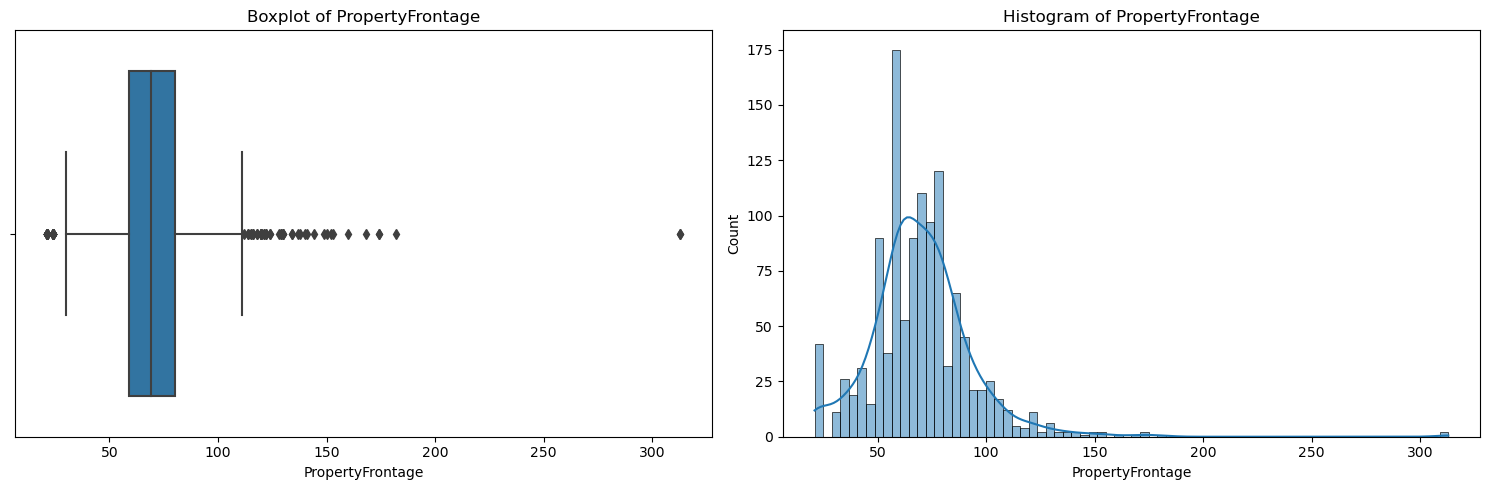

In [42]:
## We can see that there are around 17% of missing values in ProperatyFrontage column, so lets impute with the median value
## so lets visualize wth the histplot and boxplot
# Plot boxplot and histogram for PropertyFrontage column
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Boxplot
sns.boxplot(data=df, x="PropertyFrontage", ax=ax1)
ax1.set_title("Boxplot of PropertyFrontage")

# Histogram
sns.histplot(data=df, x="PropertyFrontage", kde=True, ax=ax2)
ax2.set_title("Histogram of PropertyFrontage")

plt.tight_layout()
plt.show()



In [43]:
## As the data is right skewed of the column "PropertyFrontage", so we will impute the data with mean value.

propertyfrontage_mean = df['PropertyFrontage'].mean()
df_new["PropertyFrontage"].replace(np.nan, propertyfrontage_mean, inplace=True)
df_new["PropertyFrontage"].isnull().sum()

0

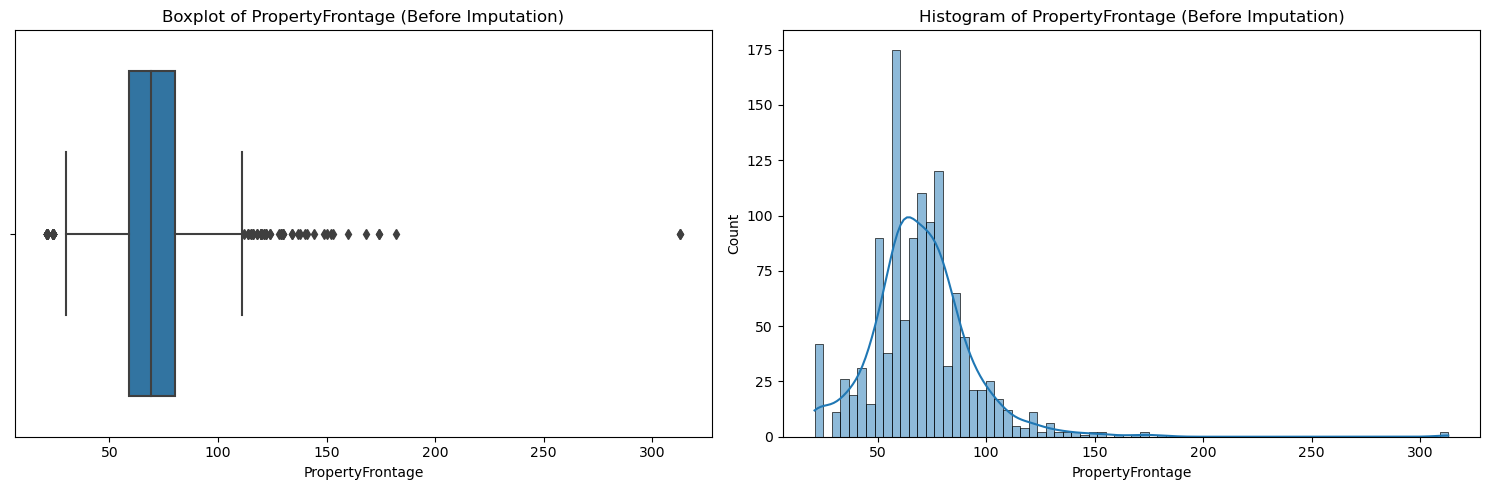

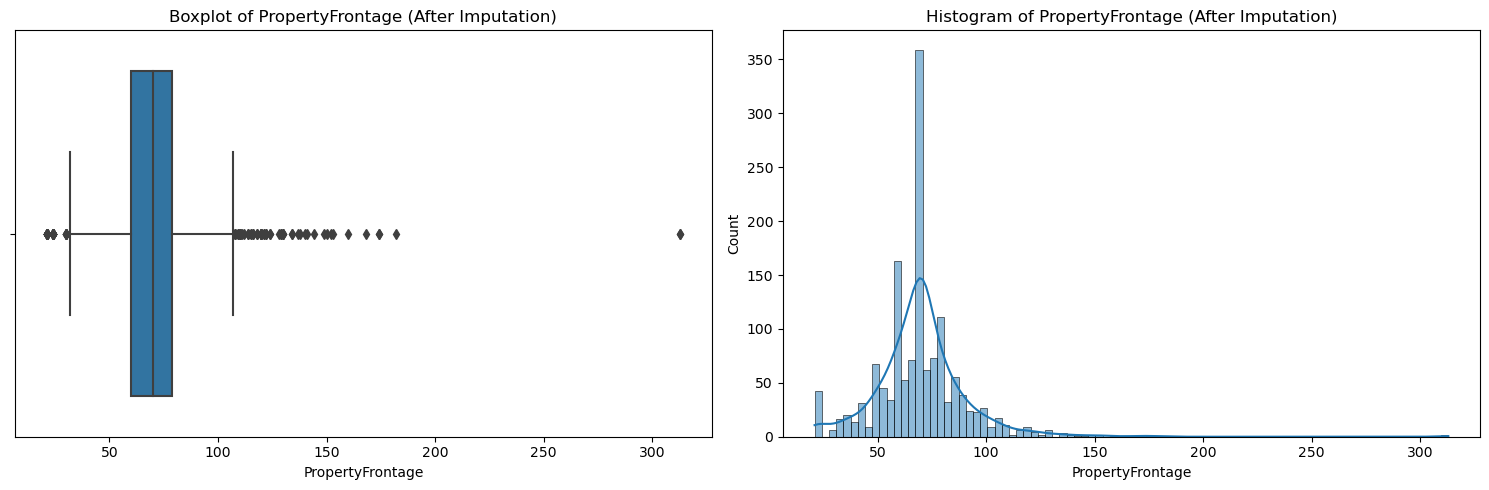

In [45]:
# Before imputation
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Boxplot before imputation
sns.boxplot(data=df, x="PropertyFrontage", ax=ax1)
ax1.set_title("Boxplot of PropertyFrontage (Before Imputation)")

# Histogram before imputation
sns.histplot(data=df, x="PropertyFrontage", kde=True, ax=ax2)
ax2.set_title("Histogram of PropertyFrontage (Before Imputation)")

plt.tight_layout()
plt.show()

# After imputation
# Assuming df_imputed is your DataFrame after imputing the missing values in the PropertyFrontage column

fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Boxplot after imputation
sns.boxplot(data=df_new, x="PropertyFrontage", ax=ax3)
ax3.set_title("Boxplot of PropertyFrontage (After Imputation)")

# Histogram after imputation
sns.histplot(data=df_new, x="PropertyFrontage", kde=True, ax=ax4)
ax4.set_title("Histogram of PropertyFrontage (After Imputation)")

plt.tight_layout()
plt.show()


# Handling ExteriorCladdingType=59.726027 ExteriorCladdingArea=0.547945

In [46]:
df["ExteriorCladdingType"].value_counts()

ExteriorCladdingType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [47]:
exteriorcladdingType_const = "NA"
df_new["ExteriorCladdingType"].replace(np.nan, exteriorcladdingType_const, inplace=True)
df_new["ExteriorCladdingType"].isnull().sum()

0

In [48]:
df_new["ExteriorCladdingType"].value_counts()

ExteriorCladdingType
NA         872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [49]:
exteriorcladdingarea_const = 0
df_new["ExteriorCladdingArea"].replace(np.nan, exteriorcladdingarea_const, inplace=True)
df_new["ExteriorCladdingArea"].isnull().sum()

0

# Handling Bsmnt Features

In [50]:
cat_bsmnt_feature = ["BsmntFinish",
"BsmntMaintenance",         
"BsmntVisibility",          
"BsmntFinRat1",             
"BsmntFinQual1",
"BasementType",
"BasementFinish",
"BasementQual",
"BasementCond"]            

num_bsmnt_feature = ["BasementYrBlt"]

<Axes: ylabel='PropertyID'>

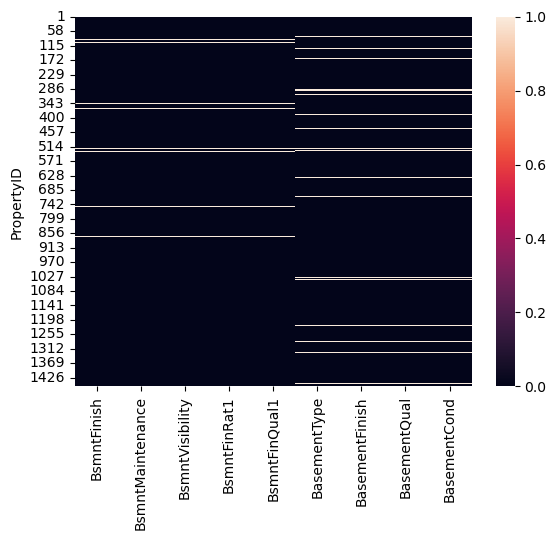

In [51]:
## from below heatmap we can see that the values are missing in the same rows in all the variables.

sns.heatmap(df[cat_bsmnt_feature].isnull())

In [52]:
## let us see the value_counts of cat_bsmnt_feature at a time by applying forloop

for feat in cat_bsmnt_feature:
    print(f"Value count for (feat):", df[feat].value_counts())

Value count for (feat): BsmntFinish
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
Value count for (feat): BsmntMaintenance
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
Value count for (feat): BsmntVisibility
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
Value count for (feat): BsmntFinRat1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
Value count for (feat): BsmntFinQual1
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
Value count for (feat): BasementType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
Value count for (feat): BasementFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64
Value count for (feat): BasementQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
Value count for (feat): BasementCond
TA    1326

In [55]:
##from our domain knowledge we came to know that there may be houses whose basement is not present, so we will impute the
##categorical basement features with NA constant value

bsmnt_const = "NA"

for feat in cat_bsmnt_feature:
    df_new[feat].replace(np.nan, bsmnt_const, inplace=True)

In [56]:
df_new[cat_bsmnt_feature].isnull().sum()

BsmntFinish         0
BsmntMaintenance    0
BsmntVisibility     0
BsmntFinRat1        0
BsmntFinQual1       0
BasementType        0
BasementFinish      0
BasementQual        0
BasementCond        0
dtype: int64

<Axes: ylabel='PropertyID'>

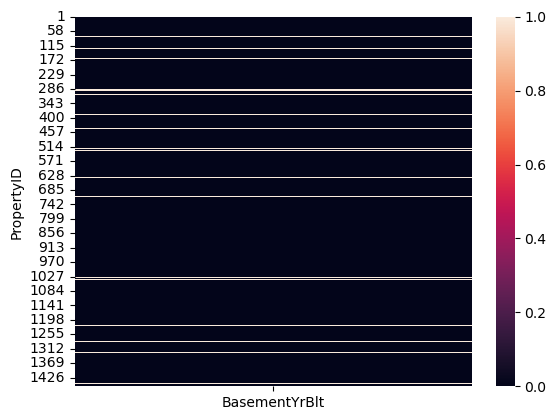

In [57]:
## from below heatmap we can see that the values are missing in the same rows in all the variables.
## so, for the property which do not have basement the basement area is also not there so we will impute the numerical basement feature with 0 value.

sns.heatmap(df[num_bsmnt_feature].isnull())

In [58]:
bsmnt_num = 0

for feat in num_bsmnt_feature:
    df_new[feat].replace(np.nan, bsmnt_num, inplace=True)

In [59]:
df_new[num_bsmnt_feature].isnull().sum()

BasementYrBlt    0
dtype: int64

# Handling Electrical=0.068493

In [60]:
df["Electrical"].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [61]:
df["Electrical"].isnull().sum()

1

In [62]:
##from above we can see that only 1 value is missing, so we will fill that value with mode of that column.

electrical_mode = df['Electrical'].mode()[0]
df_new["Electrical"].replace(np.nan, electrical_mode, inplace=True)
df_new["Electrical"].isnull().sum()

0

# Handling other features

In [63]:
df["QualFireplace"].value_counts()

QualFireplace
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [64]:
df["PoolQC"].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [65]:
df["BoundaryFeatures"].value_counts()

BoundaryFeatures
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [66]:
df["AddFeatures"].value_counts()

AddFeatures
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [67]:
## from the domain knowledge we came to know that we will impute the respective columns with constant NA

qualfireplace_const="NA"
df_new["QualFireplace"].replace(np.nan, qualfireplace_const, inplace=True)
df_new["QualFireplace"].isnull().sum()

0

In [68]:
poolqc_const="NA"
df_new["PoolQC"].replace(np.nan, poolqc_const, inplace=True)
df_new["PoolQC"].isnull().sum()

0

In [69]:
boundaryfeatures_const="NA"
df_new["BoundaryFeatures"].replace(np.nan, boundaryfeatures_const, inplace=True)
df_new["BoundaryFeatures"].isnull().sum()

0

In [70]:
addfeatures_const="NA"
df_new["AddFeatures"].replace(np.nan, addfeatures_const, inplace=True)
df_new["AddFeatures"].isnull().sum()

0

In [71]:
##FROM THIS WE HAVE COMPLETED ALL THE MISSING VALUE IMPUTATION

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyClass         1460 non-null   int64  
 1   PropertyZone          1460 non-null   object 
 2   PropertyFrontage      1201 non-null   float64
 3   PropertySize          1460 non-null   int64  
 4   Street                1460 non-null   object 
 5   Alley                 91 non-null     object 
 6   PropertyShape         1460 non-null   object 
 7   Elevation             1460 non-null   object 
 8   Amenities             1460 non-null   object 
 9   Orientation           1460 non-null   object 
 10  Grade                 1460 non-null   object 
 11  Neighborhood          1460 non-null   object 
 12  Condition1            1460 non-null   object 
 13  Condition2            1460 non-null   object 
 14  BldgType              1460 non-null   object 
 15  PropertyStyle         1460

# FEATURE TRANSFORMATION

# Convert numerical data to categorical data

##Now this conversion of numerical to categorical data is done because we have some columns for ex. Propertyclass in which the numerical data is given according to different styles because there is no property class we tell it is of 190 class or 60 class etc. so we will convert these type of features to string.

In [73]:
for_num_to_cat_conv = ["PropertyClass", "YearBuilt", "YearRemodAdd", "SaleMon", "SaleYr"]

In [74]:
df_new[for_num_to_cat_conv].head()

,PropertyClass,YearBuilt,YearRemodAdd,SaleMon,SaleYr
PropertyID,,,,,
1,60,2003,2003,2,2008
2,20,1976,1976,5,2007
3,60,2001,2002,9,2008
4,70,1915,1970,2,2006
5,60,2000,2000,12,2008


In [75]:
df_new["SaleMon"].value_counts()

SaleMon
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

In [76]:
df_new["SaleMon"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [77]:
##from the above output we saw that the month of sale is given in integer which ranges from 1 to 12, so we will replace these integer to respective month names.

In [78]:
calendar.month_abbr[1]

'Jan'

In [79]:
## we wil use the apply function for doing that.

df_new["SaleMon"]=df_new["SaleMon"].apply(lambda x: calendar.month_abbr[x])


In [80]:
df_new["SaleMon"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [81]:
for feat in for_num_to_cat_conv:
    df_new[feat] = df_new[feat].astype(str)

In [82]:
##from below we have converted all above mentioned numerical to categorical so that when we train model in future, model will perform well to acheive the target value.

for feat in for_num_to_cat_conv:
   print(f"{feat}:data type = {df_new[feat].dtype}")

PropertyClass:data type = object
YearBuilt:data type = object
YearRemodAdd:data type = object
SaleMon:data type = object
SaleYr:data type = object


# Convert Categorical features to Numerical Features

# ORDINAL ENCODING

# From the domain knowledge we have to find out the features in which the ordinal values may be present which we have to convert to numbers/numerical features.

In [83]:
ordinal_encod_var = [
"ExterQual"
"ExterCond"
"BasementQual"
"BasementCond"
"BsmntMaintenance"
"BsmntVisibility"
"BsmntFinRat1"
"BsmntFinQual1"
"BsmntFinish"
"BasementFinish"                
"HeatingEfficiency"   
"KitchenQual" 
"QualFireplace"
"PoolQC"                
"Functional"
"PavedDrive"
"Amenities"          
]

In [84]:
df_new["ExterQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [85]:
df_new["ExterQual"].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [86]:
CategoricalDtype

df_new["ExterQual"]=df_new["ExterQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [87]:
df_new["ExterQual"].value_counts()

ExterQual
2    906
3    488
4     52
1     14
Name: count, dtype: int64

In [88]:
df_new["ExterCond"].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [89]:
df_new["ExterCond"].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [90]:
df_new["ExterCond"]=df_new["ExterCond"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [91]:
df_new["ExterCond"].value_counts()

ExterCond
2    1282
3     146
1      28
4       3
0       1
Name: count, dtype: int64

In [92]:
df_new["BasementQual"].unique()

array(['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po'], dtype=object)

In [93]:
df_new["BasementQual"].value_counts()

BasementQual
TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [94]:
df_new["BasementQual"]=df_new["BasementQual"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [95]:
df_new["BasementQual"].value_counts()

BasementQual
3    1311
0      81
2      48
4      14
5       3
1       3
Name: count, dtype: int64

In [96]:
df_new["BasementCond"].unique()

array(['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex'], dtype=object)

In [97]:
df_new["BasementCond"]=df_new["BasementCond"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [98]:
df_new["BasementCond"].value_counts()

BasementCond
3    1326
0      81
2      35
4       9
1       7
5       2
Name: count, dtype: int64

In [99]:
df_new["BsmntMaintenance"].unique()

array(['TA', 'Gd', 'NA', 'Fa', 'Po'], dtype=object)

In [100]:
df_new["BsmntMaintenance"]=df_new["BsmntMaintenance"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [101]:
df_new["BsmntMaintenance"].value_counts()

BsmntMaintenance
3    1311
4      65
2      45
0      37
1       2
Name: count, dtype: int64

In [102]:
df_new["BsmntVisibility"].unique()

array(['No', 'Gd', 'Mn', 'Av', 'NA'], dtype=object)

In [103]:
df_new["BsmntVisibility"]=df_new["BsmntVisibility"].astype(CategoricalDtype(categories=["NA", "No", "Mn", "Av", "Gd"], ordered=True)).cat.codes

In [104]:
df_new["BsmntVisibility"].value_counts()

BsmntVisibility
1    953
3    221
4    134
2    114
0     38
Name: count, dtype: int64

In [105]:
df_new["BasementFinish"].unique()

array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object)

In [106]:
df_new["BasementFinish"]=df_new["BasementFinish"].astype(CategoricalDtype(categories=["NA", "Unf", "RFn", "Fin"], ordered=True)).cat.codes

In [107]:
df_new["BasementFinish"].value_counts()

BasementFinish
1    605
2    422
3    352
0     81
Name: count, dtype: int64

In [108]:
df_new["HeatingEfficiency"].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [109]:
df_new["HeatingEfficiency"]=df_new["HeatingEfficiency"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [110]:
df_new["HeatingEfficiency"].value_counts()

HeatingEfficiency
4    741
2    428
3    241
1     49
0      1
Name: count, dtype: int64

In [111]:
df_new["KitchenQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [112]:
df_new["KitchenQual"]=df_new["KitchenQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [113]:
df_new["KitchenQual"].value_counts()

KitchenQual
2    735
3    586
4    100
1     39
Name: count, dtype: int64

In [114]:
df_new["QualFireplace"].unique()

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [115]:
df_new["QualFireplace"]=df_new["QualFireplace"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [116]:
df_new["QualFireplace"].value_counts()

QualFireplace
0    690
4    380
3    313
2     33
5     24
1     20
Name: count, dtype: int64

In [117]:
df_new["PoolQC"].unique()

array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

In [118]:
df_new["PoolQC"]=df_new["PoolQC"].astype(CategoricalDtype(categories=["NA", "Fa", "Gd", "Ex"], ordered=True)).cat.codes

In [119]:
df_new["PoolQC"].value_counts()

PoolQC
0    1453
2       3
3       2
1       2
Name: count, dtype: int64

In [120]:
df_new["Functional"].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [121]:
df_new["Functional"]=df_new["Functional"].astype(CategoricalDtype(categories=["Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ" ], ordered=True)).cat.codes

In [122]:
df_new["Functional"].value_counts()

Functional
6    1360
4      34
5      31
3      15
2      14
1       5
0       1
Name: count, dtype: int64

In [123]:
df_new["PavedDrive"].unique()

array(['Y', 'N', 'P'], dtype=object)

In [124]:
df_new["PavedDrive"]=df_new["PavedDrive"].astype(CategoricalDtype(categories=["N", "P", "Y" ], ordered=True)).cat.codes

In [125]:
df_new["PavedDrive"].value_counts()

PavedDrive
2    1340
0      90
1      30
Name: count, dtype: int64

In [126]:

df_new["Amenities"].unique()


array(['AllPub', 'NoSeWa'], dtype=object)

In [127]:
df_new["Amenities"]=df_new["Amenities"].astype(CategoricalDtype(categories=["AllPub", "NoSeWa"], ordered=True)).cat.codes

In [128]:
df_new["Amenities"].value_counts()

Amenities
0    1459
1       1
Name: count, dtype: int64

In [129]:

df_new["BsmntFinRat1"].unique()


array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'], dtype=object)

In [130]:
df_new["BsmntFinRat1"]=df_new["BsmntFinRat1"].astype(CategoricalDtype(categories=["NA","Unf","LwQ", "Rec", "BLQ","ALQ", "GLQ" ], ordered=True)).cat.codes

In [131]:
df_new["BsmntFinRat1"].value_counts()

BsmntFinRat1
1    430
6    418
5    220
4    148
3    133
2     74
0     37
Name: count, dtype: int64

In [132]:
         
df_new["BsmntFinQual1"].unique()

array(['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [133]:
df_new["BsmntFinQual1"]=df_new["BsmntFinQual1"].astype(CategoricalDtype(categories=["NA","Unf","LwQ", "Rec", "BLQ","ALQ", "GLQ" ], ordered=True)).cat.codes

In [134]:
df_new["BsmntFinQual1"].value_counts()

BsmntFinQual1
1    1256
3      54
2      46
0      38
4      33
5      19
6      14
Name: count, dtype: int64

In [135]:
df_new["BsmntFinish"].unique()

array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

In [136]:
df_new["BsmntFinish"]=df_new["BsmntFinish"].astype(CategoricalDtype(categories=["NA", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [137]:
df_new["BsmntFinish"].value_counts()

BsmntFinish
2    649
3    618
4    121
0     37
1     35
Name: count, dtype: int64

In [244]:
df_new.isnull().sum()

PropertyClass           0
PropertyZone            0
PropertyFrontage        0
PropertySize            0
Street                  0
Alley                   0
PropertyShape           0
Elevation               0
Amenities               0
Orientation             0
Grade                   0
Neighborhood            0
Condition1              0
Condition2              0
BldgType                0
PropertyStyle           0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
RoofStyle               0
RoofMatl                0
Roof1Material           0
Roof2Material           0
ExteriorCladdingType    0
ExteriorCladdingArea    0
ExterQual               0
ExterCond               0
PropertyFooting         0
BsmntFinish             0
BsmntMaintenance        0
BsmntVisibility         0
BsmntFinRat1            0
BsmntFinSty1            0
BsmntFinQual1           0
BsmtFinSF2              0
BsmtUnfSF               0
BsmntSqFtage            0
Heating     

<Axes: ylabel='PropertyID'>

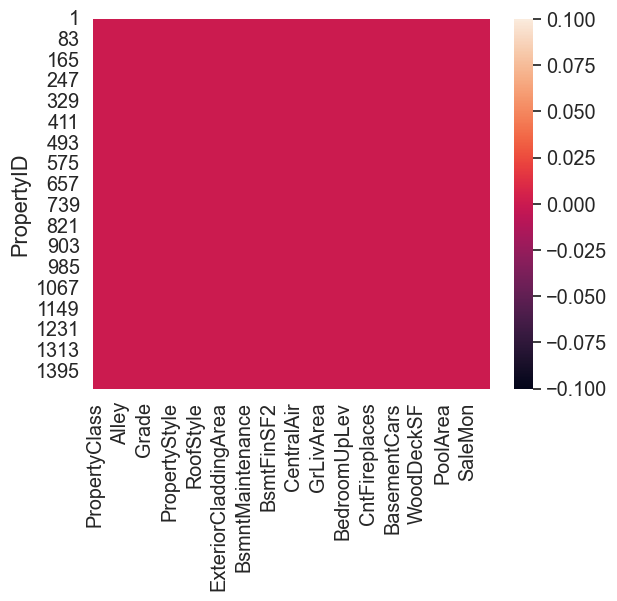

In [245]:
sns.heatmap(df_new.isnull())

# One Hot Encoding for Nominal Categorical Data

In [139]:
df_encod = df_new.copy()

object_features = df_encod.select_dtypes(include="object").columns.tolist()
print("Total object data type features:", len(object_features))

print("features: \n", object_features)

Total object data type features: 31
features: 
 ['PropertyClass', 'PropertyZone', 'Street', 'Alley', 'PropertyShape', 'Elevation', 'Orientation', 'Grade', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'PropertyStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material', 'Roof2Material', 'ExteriorCladdingType', 'PropertyFooting', 'Heating', 'CentralAir', 'Electrical', 'BasementType', 'BoundaryFeatures', 'AddFeatures', 'SaleMon', 'SaleYr', 'SaleType', 'SaleCondn']


In [140]:
df_encod[object_features].head(2)

,PropertyClass,PropertyZone,Street,Alley,PropertyShape,Elevation,Orientation,Grade,Neighborhood,Condition1,Condition2,BldgType,PropertyStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Roof1Material,Roof2Material,ExteriorCladdingType,PropertyFooting,Heating,CentralAir,Electrical,BasementType,BoundaryFeatures,AddFeatures,SaleMon,SaleYr,SaleType,SaleCondn
PropertyID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,CBlock,GasA,Y,SBrkr,Attchd,NA,NA,May,2007,WD,Normal


In [141]:
print("Shape of DF before encoding:", df_encod.shape)

df_encod = pd.get_dummies(df_encod, columns=object_features, prefix=object_features, drop_first=True)

print("Shape of DF after encoding:", df_encod.shape)


Shape of DF before encoding: (1460, 80)
Shape of DF after encoding: (1460, 404)


In [142]:
df_encod.head(2)

,PropertyFrontage,PropertySize,Amenities,OverallQual,OverallCond,ExteriorCladdingArea,ExterQual,ExterCond,BsmntFinish,BsmntMaintenance,BsmntVisibility,BsmntFinRat1,BsmntFinSty1,BsmntFinQual1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,HeatingEfficiency,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,KitchenQual,CntRmsUpLev,Functional,CntFireplaces,QualFireplace,BasementYrBlt,BasementFinish,BasementCars,BasementSqFootage,BasementQual,BasementCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,AddVal,PropPrice,PropertyClass_160,PropertyClass_180,PropertyClass_190,PropertyClass_20,PropertyClass_30,PropertyClass_40,PropertyClass_45,PropertyClass_50,PropertyClass_60,PropertyClass_70,PropertyClass_75,PropertyClass_80,PropertyClass_85,PropertyClass_90,PropertyZone_FV,PropertyZone_RH,PropertyZone_RL,PropertyZone_RM,Street_Pave,Alley_NA,Alley_Pave,PropertyShape_IR2,PropertyShape_IR3,PropertyShape_Reg,Elevation_HLS,Elevation_Low,Elevation_Lvl,Orientation_CulDSac,Orientation_FR2,Orientation_FR3,Orientation_Inside,Grade_Mod,Grade_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,PropertyStyle_1.5Unf,PropertyStyle_1Story,PropertyStyle_2.5Fin,PropertyStyle_2.5Unf,PropertyStyle_2Story,PropertyStyle_SFoyer,PropertyStyle_SLvl,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1

In [143]:
df_encod=df_encod.applymap(lambda x:1 if x is True else (0 if x is False else x))

In [144]:
df_encod.head()

,PropertyFrontage,PropertySize,Amenities,OverallQual,OverallCond,ExteriorCladdingArea,ExterQual,ExterCond,BsmntFinish,BsmntMaintenance,BsmntVisibility,BsmntFinRat1,BsmntFinSty1,BsmntFinQual1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,HeatingEfficiency,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,KitchenQual,CntRmsUpLev,Functional,CntFireplaces,QualFireplace,BasementYrBlt,BasementFinish,BasementCars,BasementSqFootage,BasementQual,BasementCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,AddVal,PropPrice,PropertyClass_160,PropertyClass_180,PropertyClass_190,PropertyClass_20,PropertyClass_30,PropertyClass_40,PropertyClass_45,PropertyClass_50,PropertyClass_60,PropertyClass_70,PropertyClass_75,PropertyClass_80,PropertyClass_85,PropertyClass_90,PropertyZone_FV,PropertyZone_RH,PropertyZone_RL,PropertyZone_RM,Street_Pave,Alley_NA,Alley_Pave,PropertyShape_IR2,PropertyShape_IR3,PropertyShape_Reg,Elevation_HLS,Elevation_Low,Elevation_Lvl,Orientation_CulDSac,Orientation_FR2,Orientation_FR3,Orientation_Inside,Grade_Mod,Grade_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,PropertyStyle_1.5Unf,PropertyStyle_1Story,PropertyStyle_2.5Fin,PropertyStyle_2.5Unf,PropertyStyle_2Story,PropertyStyle_SFoyer,PropertyStyle_SLvl,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1

In [145]:
df_encod.select_dtypes(include="object").columns.tolist()


[]

# CHECKING THE CORRELATION

In [146]:
df_encod.corr()

,PropertyFrontage,PropertySize,Amenities,OverallQual,OverallCond,ExteriorCladdingArea,ExterQual,ExterCond,BsmntFinish,BsmntMaintenance,BsmntVisibility,BsmntFinRat1,BsmntFinSty1,BsmntFinQual1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,HeatingEfficiency,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,KitchenQual,CntRmsUpLev,Functional,CntFireplaces,QualFireplace,BasementYrBlt,BasementFinish,BasementCars,BasementSqFootage,BasementQual,BasementCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,AddVal,PropPrice,PropertyClass_160,PropertyClass_180,PropertyClass_190,PropertyClass_20,PropertyClass_30,PropertyClass_40,PropertyClass_45,PropertyClass_50,PropertyClass_60,PropertyClass_70,PropertyClass_75,PropertyClass_80,PropertyClass_85,PropertyClass_90,PropertyZone_FV,PropertyZone_RH,PropertyZone_RL,PropertyZone_RM,Street_Pave,Alley_NA,Alley_Pave,PropertyShape_IR2,PropertyShape_IR3,PropertyShape_Reg,Elevation_HLS,Elevation_Low,Elevation_Lvl,Orientation_CulDSac,Orientation_FR2,Orientation_FR3,Orientation_Inside,Grade_Mod,Grade_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,PropertyStyle_1.5Unf,PropertyStyle_1Story,PropertyStyle_2.5Fin,PropertyStyle_2.5Unf,PropertyStyle_2Story,PropertyStyle_SFoyer,PropertyStyle_SLvl,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1

Text(99.74999999999999, 0.5, 'Features')

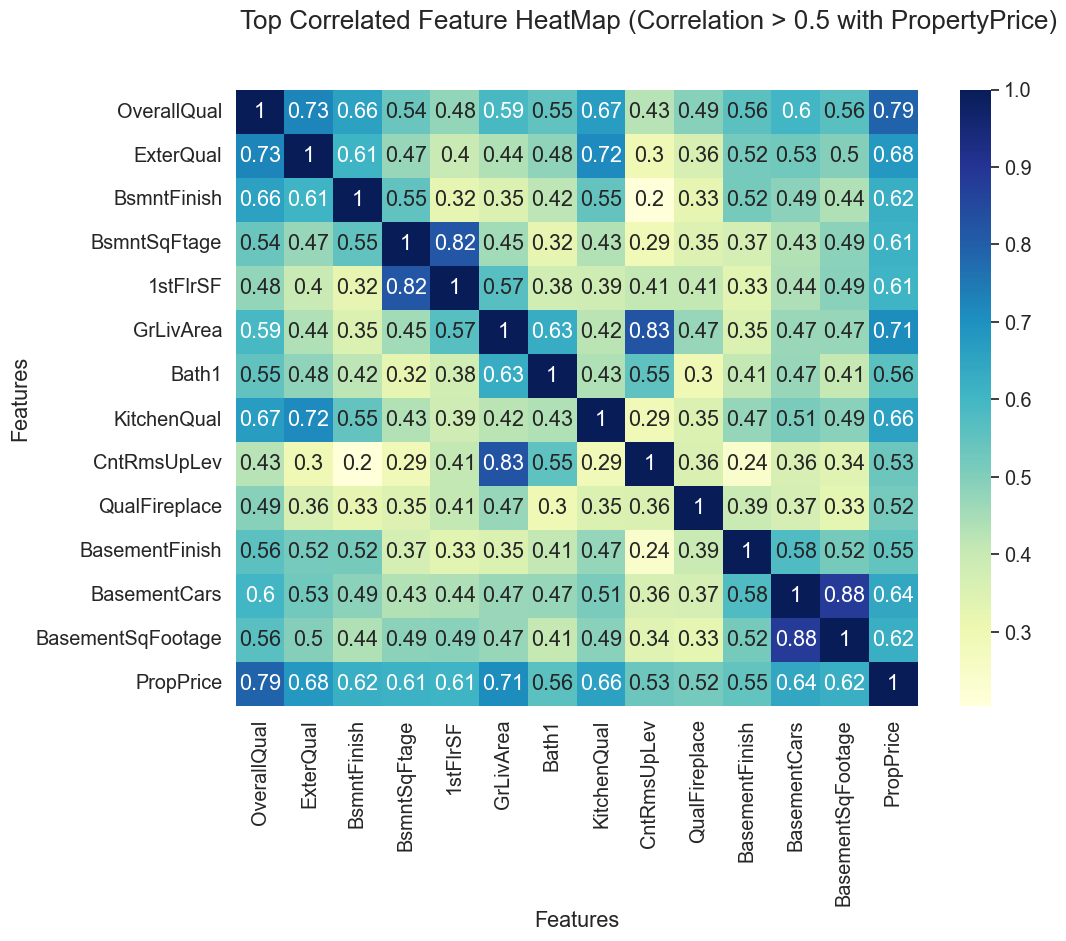

In [147]:
# most correlated features
corr_mat = df_encod.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["PropPrice"])>0.5]
g = sns.heatmap(df_encod[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with PropertyPrice)")
plt.xlabel("Features")
plt.ylabel("Features")

- OverallQual and GrLivArea seem to be the most correlated to SalePrice

In [148]:
print("Correlation Values")

corr = df_encod.corr().drop('PropPrice')
corr.sort_values(["PropPrice"], ascending = False, inplace = True)
print(corr.PropPrice)
pd.set_option("display.max_rows", None)

Correlation Values
OverallQual                0.790982
GrLivArea                  0.708624
ExterQual                  0.682639
KitchenQual                0.659600
BasementCars               0.640409
                             ...   
PropertyShape_Reg         -0.267672
PropertyZone_RM           -0.288065
PropertyFooting_CBlock    -0.343263
BasementType_Detchd       -0.354141
ExteriorCladdingType_NA   -0.367456
Name: PropPrice, Length: 403, dtype: float64


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13964\1081813862.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


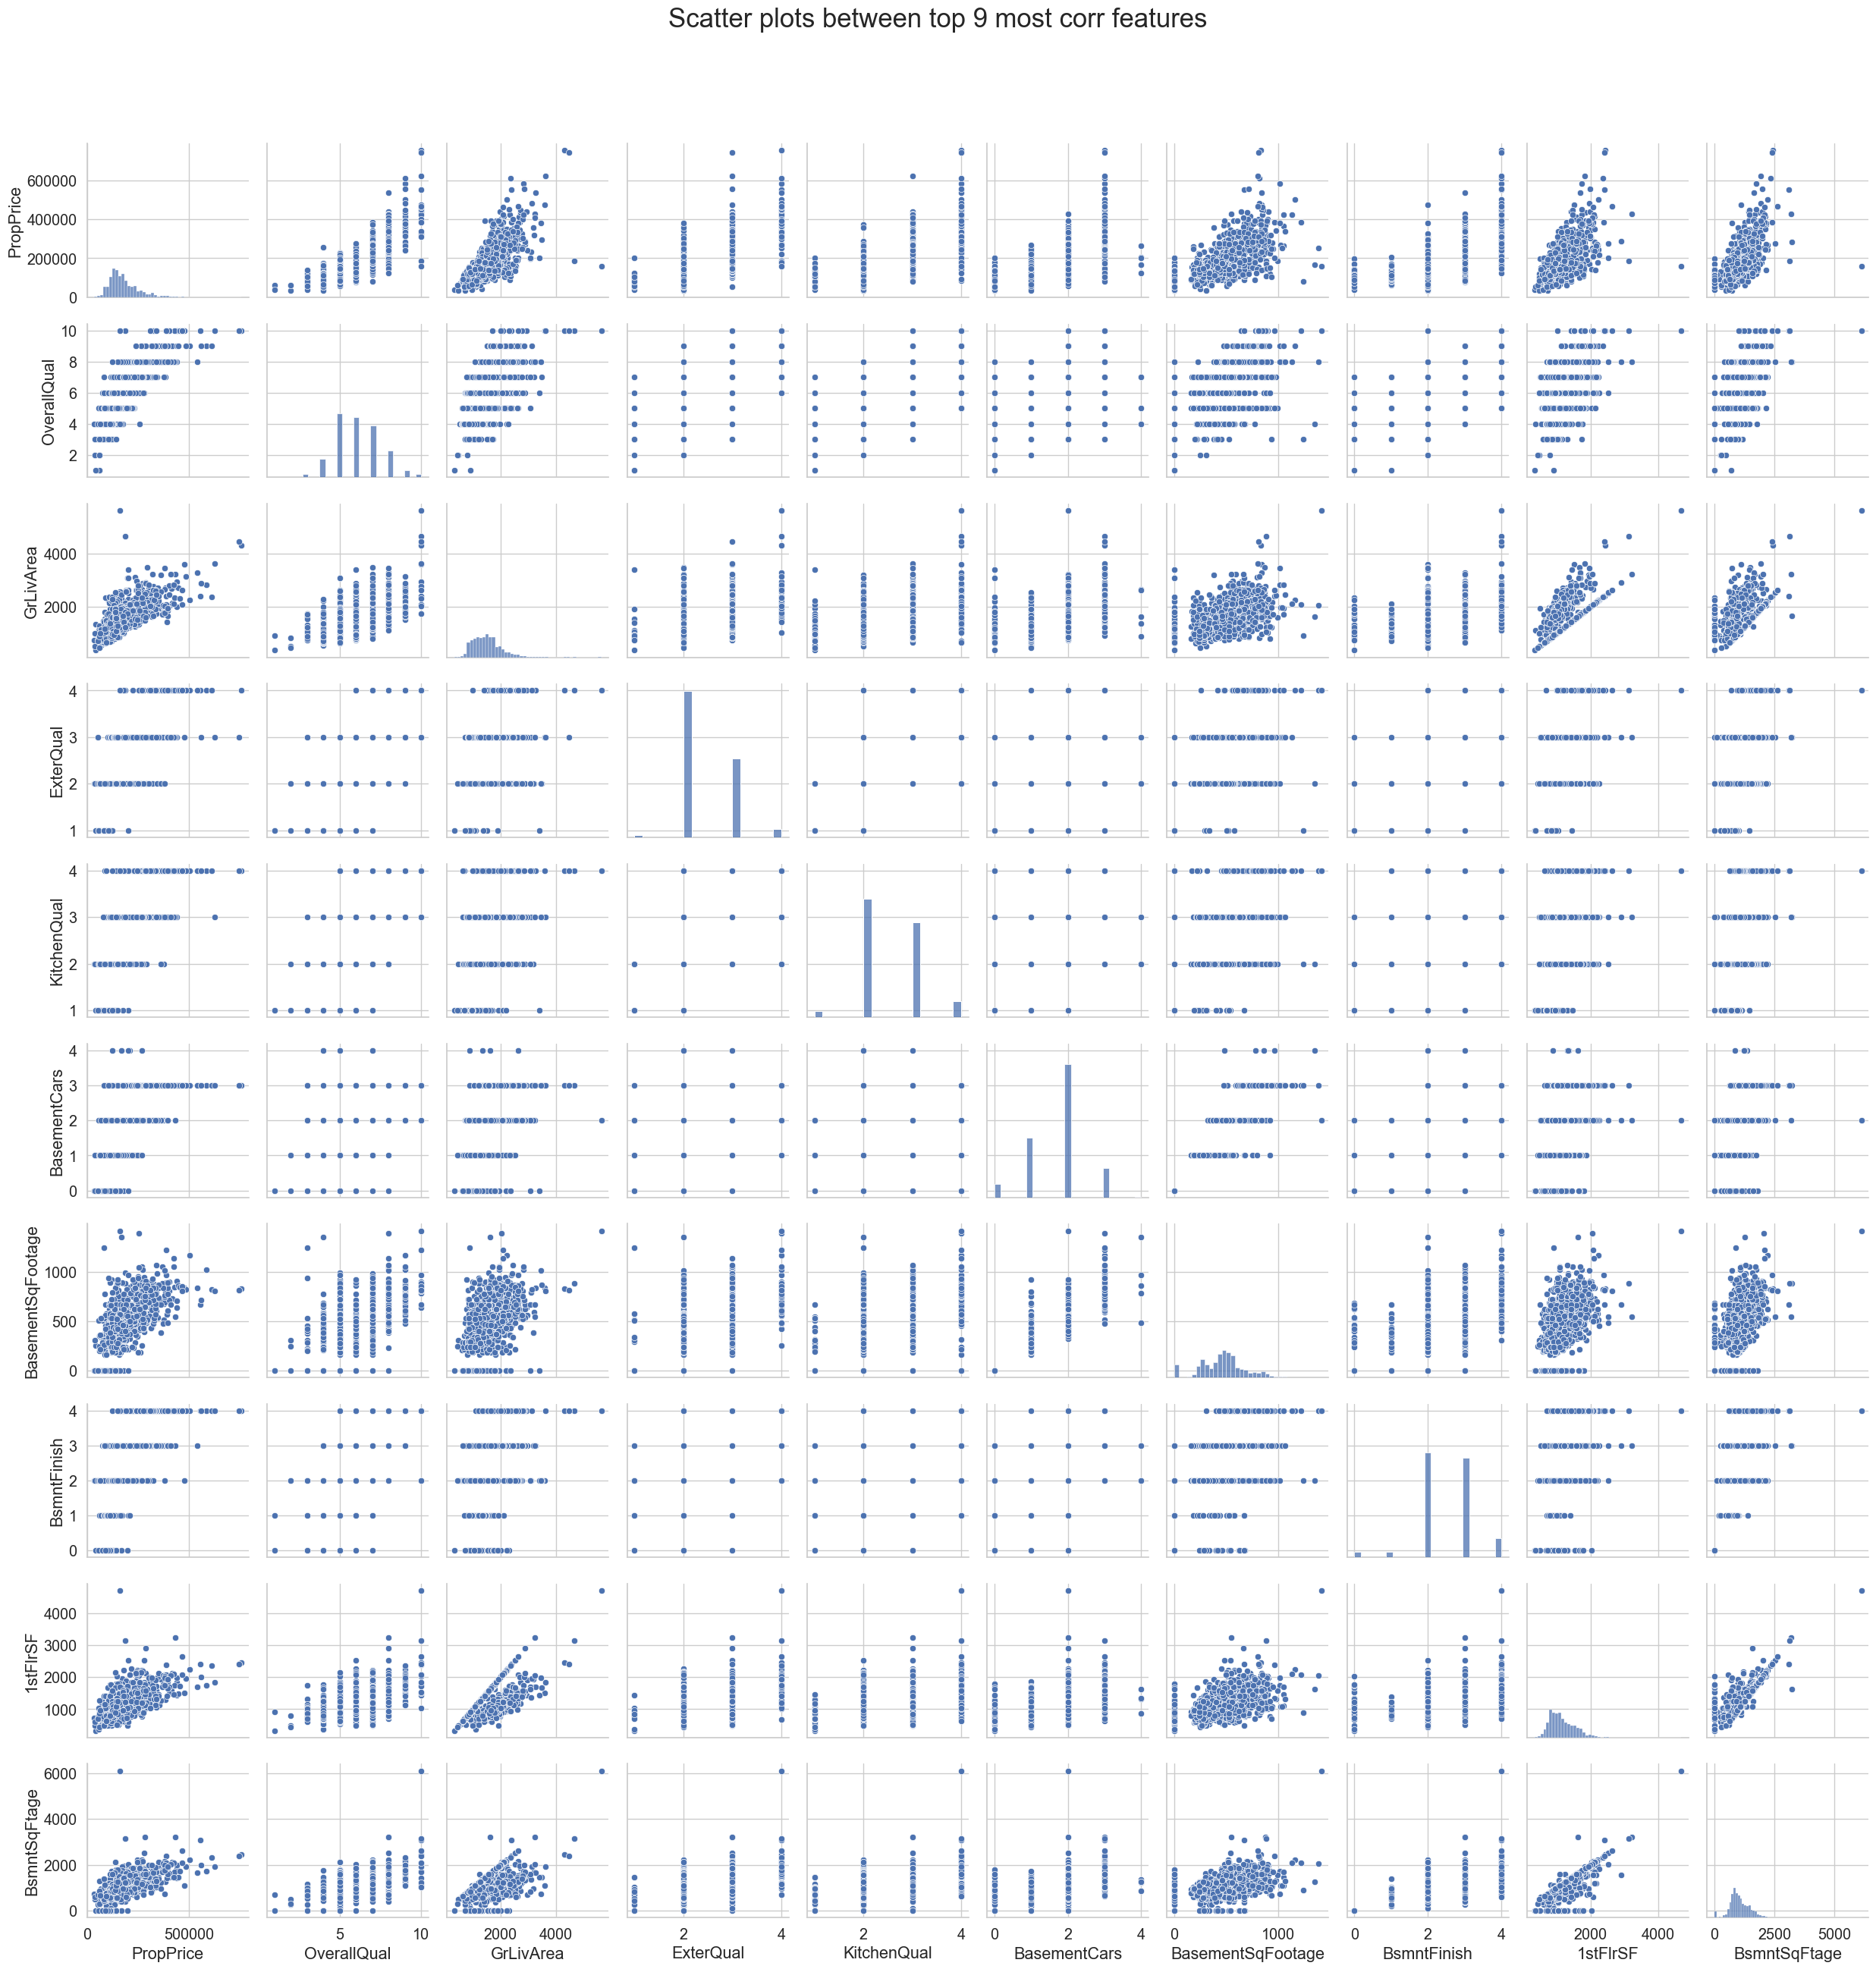

In [151]:
cols = ['PropPrice', 'OverallQual', 'GrLivArea', 'ExterQual','KitchenQual', 'BasementCars',"BasementSqFootage", "BsmntFinish",'1stFlrSF','BsmntSqFtage']
sns_plot = sns.pairplot(df_encod[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

# Checking for Outliers

In [155]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price 
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df_encod[a], y = df_encod['PropPrice'], edgecolor=edgecolor)
    plt.ylabel('PropertyPrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and Property Price")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

In [153]:
df_encod.shape

(1460, 404)

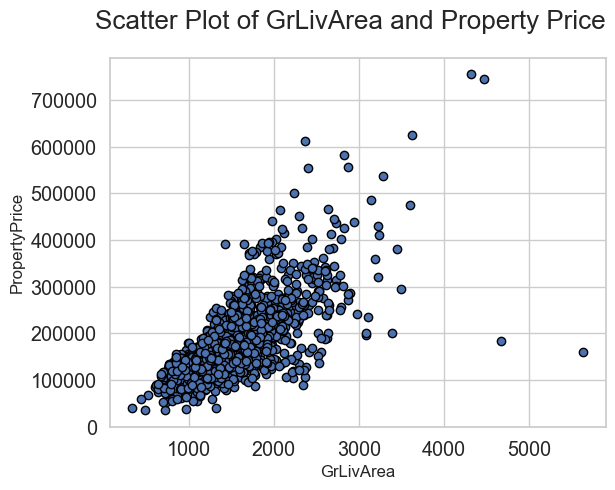

In [154]:
scatter_plot('GrLivArea')


- It can be observed that there are large outliers which can negatively affect the prediction of sale price highly
- So the outliers need to be deleted

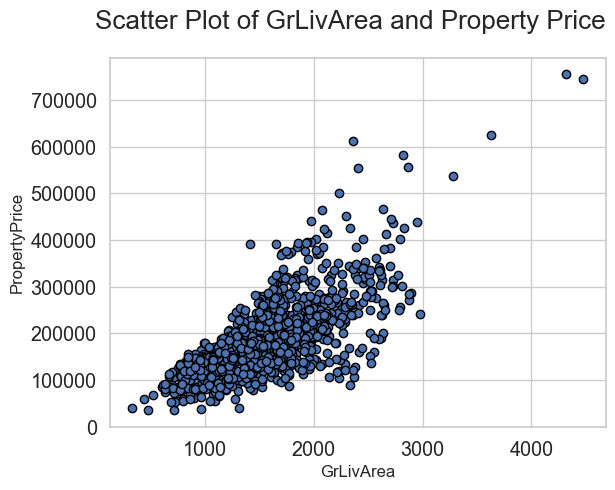

In [156]:
#Deleting outliers
df_encod =  df_encod.drop( df_encod[( df_encod['GrLivArea'] > 3000) & ( df_encod['PropPrice']<500000)].index)

#Check the graphic again
scatter_plot('GrLivArea')

In [157]:
df_encod.shape

(1446, 404)

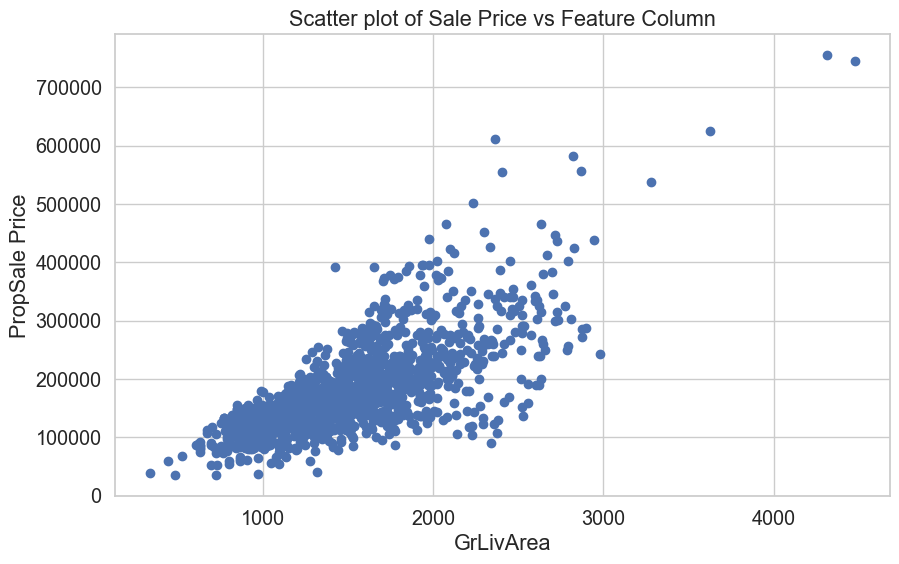

Shape of X after removing outliers: (1437, 403)
Shape of y after removing outliers: (1437,)


In [158]:
x = df_encod.drop('PropPrice', axis=1)
y = df_encod['PropPrice']

# Create scatter plot to visualize outliers
plt.figure(figsize=(10, 6))
plt.scatter(x['GrLivArea'], y)  # Replace 'Feature_Column' with the column you want to visualize
plt.title('Scatter plot of Sale Price vs Feature Column')
plt.xlabel('GrLivArea')
plt.ylabel('PropSale Price')
plt.show()

# Assuming you identify outliers visually and decide to remove them based on some threshold
# Here, we'll remove the outliers where Sale Price is greater than a certain threshold

threshold = 500000  # Define the threshold for Sale Price beyond which data points are considered outliers
outliers_indices = np.where(y > threshold)  # Get indices of outliers

# Remove outliers from the dataset
x_filtered = x.drop(outliers_indices[0])
y_filtered = y.drop(outliers_indices[0])

# Print the shape of the filtered dataset
print("Shape of X after removing outliers:", x_filtered.shape)
print("Shape of y after removing outliers:", y_filtered.shape)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13964\1341464591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encod['PropPrice'])


Skewness: 1.907956
Kurtosis: 6.970434


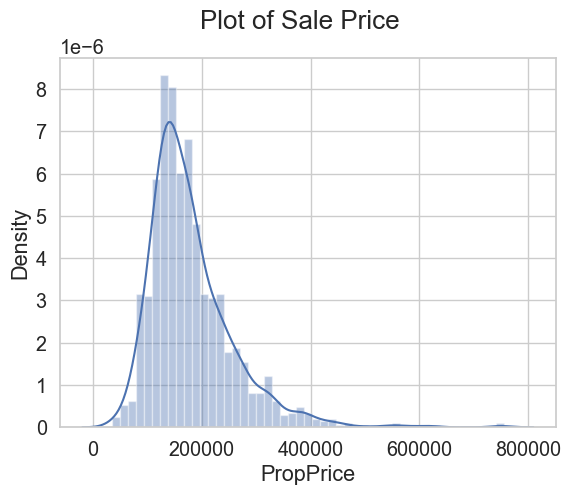

In [159]:
sns.distplot(df_encod['PropPrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % df_encod['PropPrice'].skew())
print("Kurtosis: %f" % df_encod['PropPrice'].kurt())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13964\3148013033.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encod['PropPrice'])


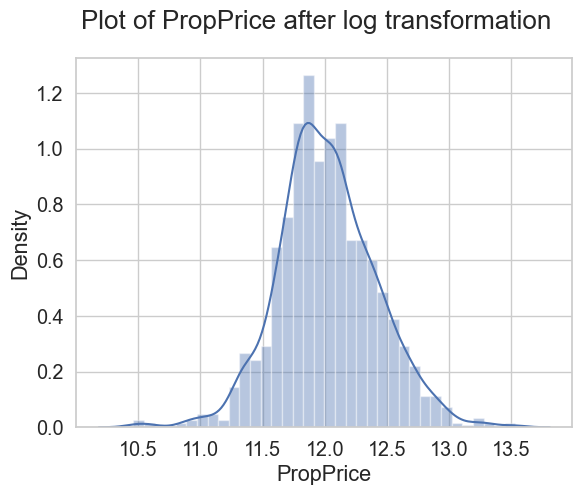

In [160]:
# applying log transformation to correct the positive skewness in the data
# taking logs means that errors in predicting expensive and cheap houses will affect the result equally

df_encod['PropPrice'] = np.log(df_encod['PropPrice'])
plt.suptitle("Plot of PropPrice after log transformation")
sns.distplot(df_encod['PropPrice'])
plt.show()

# Split Data for Training & Testing

In [161]:
x = df_encod.drop('PropPrice', axis=1)
y = df_encod['PropPrice']


In [162]:
#split data into train and test

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42, shuffle=False)

In [163]:
x_train.shape

(1156, 403)

In [164]:
x_test.shape

(290, 403)

In [165]:
y_train.shape

(1156,)

In [166]:
y_test.shape

(290,)

# Feature Scaling

In [167]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [168]:
x_train[:3,:]

array([[-0.22501589, -0.18763884, -0.02942449, ..., -0.12216944,
         0.47389479, -0.30772873],
       [ 0.48799641, -0.07990089, -0.02942449, ..., -0.12216944,
         0.47389479, -0.30772873],
       [-0.08241343,  0.07467965, -0.02942449, ..., -0.12216944,
         0.47389479, -0.30772873]])

In [169]:
x_test[:3,:]

array([[-2.72550041e-01,  2.07363543e-03, -2.94244943e-02, ...,
        -1.22169444e-01,  4.73894789e-01, -3.07728727e-01],
       [-5.57754961e-01,  3.73929461e-02, -2.94244943e-02, ...,
        -1.22169444e-01,  4.73894789e-01, -3.07728727e-01],
       [ 2.38936255e+00,  3.06831507e-01, -2.94244943e-02, ...,
        -1.22169444e-01,  4.73894789e-01, -3.07728727e-01]])

# Train ML Model

Train RMSE: 0.19040071242919282
Test RMSE: 0.2460151244976872
Train R^2 Score: 0.7712870599545207
Test R^2 Score: 0.5946905893706179


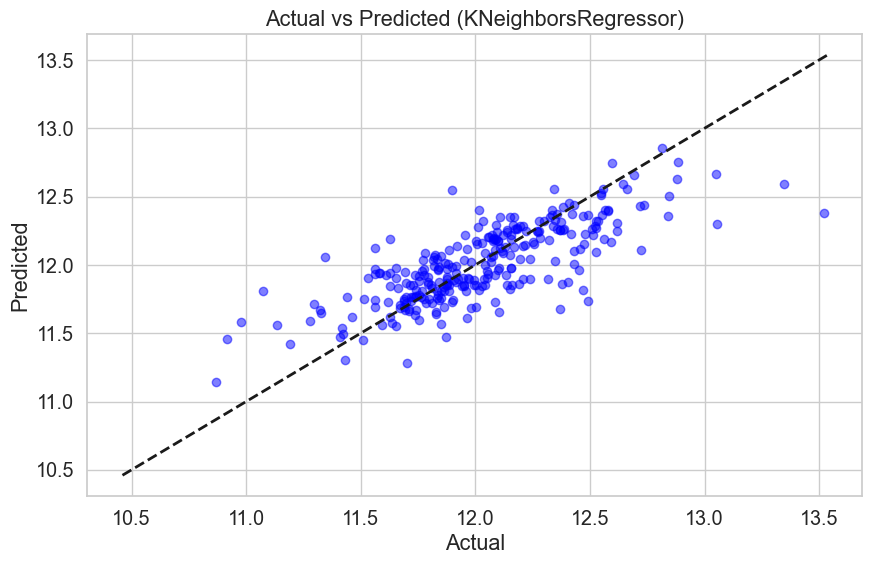

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


knr = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as per your choice
knr.fit(x_train, y_train)

# Make predictions
y_pred_train = knr.predict(x_train)
y_pred_test = knr.predict(x_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", r2_train)
print("Test R^2 Score:", r2_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (KNeighborsRegressor)')
plt.show()


Train RMSE: 0.07716589283094302
Test RMSE: 0.1227063774607368
Train R^2 Score: 0.9624331855788126
Test R^2 Score: 0.8991682411843677


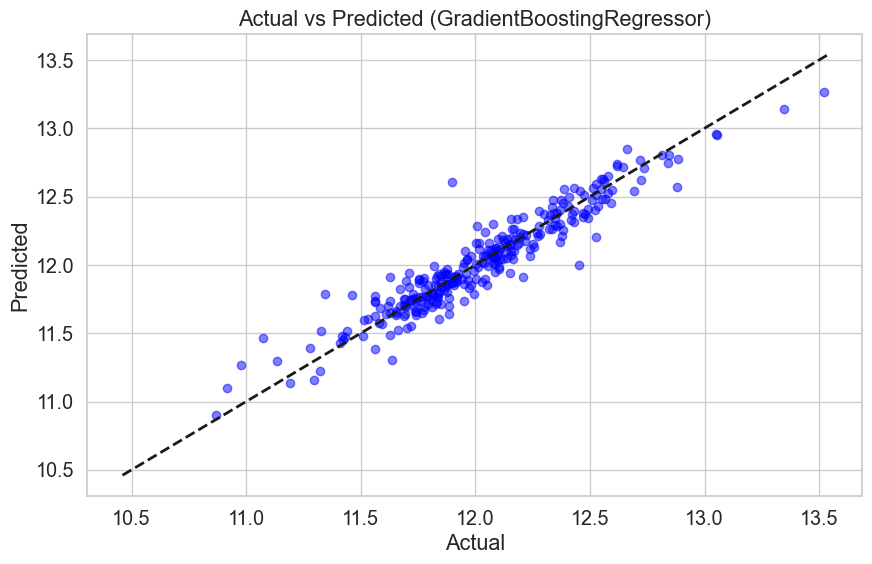

In [179]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# You can adjust parameters like n_estimators, learning_rate, and max_depth based on your requirements
gbr.fit(x_train, y_train)

# Make predictions

y_pred_train = gbr.predict(x_train)
y_pred_test = gbr.predict(x_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", r2_train)
print("Test R^2 Score:", r2_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (GradientBoostingRegressor)')
plt.show()


Train RMSE: 0.08241915756006035
Test RMSE: 0.12159953497757278
Train R^2 Score: 0.9571441670254262
Test R^2 Score: 0.9009790928213645


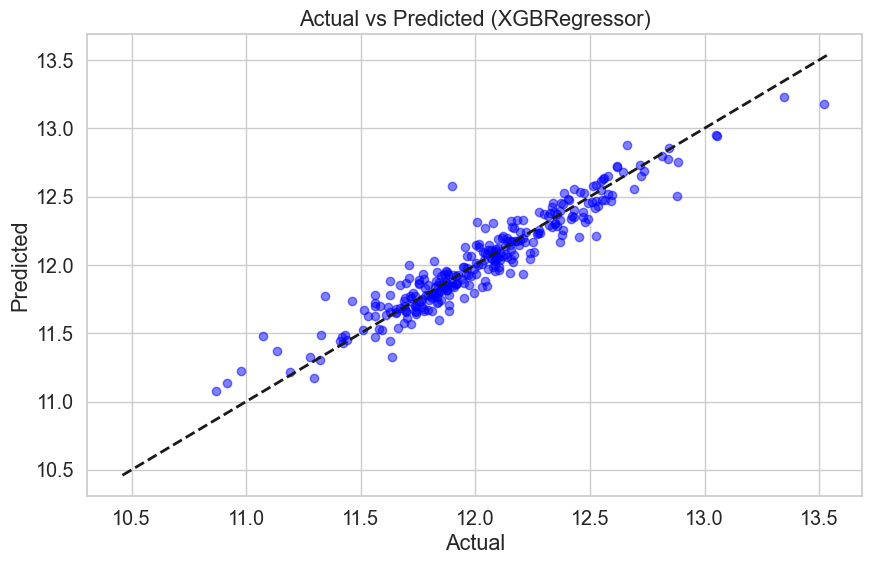

In [180]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the XGBRegressor model
xgbr = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# You can adjust parameters like n_estimators, learning_rate, and max_depth based on your requirements
xgbr.fit(x_train, y_train)

# Make predictions
y_pred_train = xgbr.predict(x_train)
y_pred_test = xgbr.predict(x_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", r2_train)
print("Test R^2 Score:", r2_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (XGBRegressor)')
plt.show()



Train RMSE: 0.1808150777593066
Test RMSE: 0.1941338742240113
Train R^2 Score: 0.793736262215915
Test R^2 Score: 0.7476137355059824


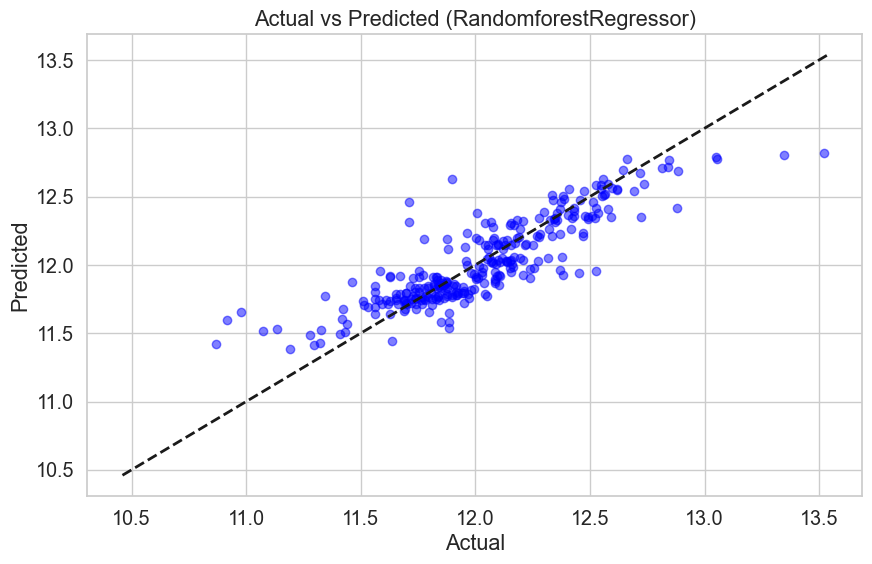

In [181]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the RandomForestRegressor model
rfr = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
# You can adjust parameters like n_estimators and max_depth based on your requirements
rfr.fit(x_train, y_train)

# Make predictions
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", r2_train)
print("Test R^2 Score:", r2_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (RandomforestRegressor)')
plt.show()


In [240]:
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import make_scorer, mean_squared_error

# Select one feature and target variable
feature_column = 'GrLivArea'  # Replace 'Feature_Column' with the column you want to use
x = df_encod[[feature_column]].values
y = df_encod['PropPrice']

# Initialize the IsotonicRegression model
ir = IsotonicRegression(out_of_bounds='clip')

# Define a custom scoring function for cross-validation
# Scikit-learn's cross-validation will maximize scores, so we negate RMSE to minimize it

def neg_rmse(y_test, y_pred):
    return -np.sqrt(mean_squared_error(y_test, y_pred))

# Use the custom scoring function in cross-validation
# We use cross-validation with 5 folds
# 'scoring' parameter is set to the custom scoring function
# We take the negative of the scores to convert RMSE back to positive
cv_scores = cross_val_score(ir, x, y, cv=5, scoring=make_scorer(neg_rmse))

# Convert the scores back to positive
cv_scores = -cv_scores

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", r2_train)
print("Test R^2 Score:", r2_test)
print("Cross-Validation RMSE Scores:", cv_scores)
print("Mean CV RMSE Score:", np.mean(cv_scores))


Train RMSE: 0.06817448214349052
Test RMSE: 0.11532655580352441
Train R^2 Score: 0.9706777498819038
Test R^2 Score: 0.9109319966357533
Cross-Validation RMSE Scores: [0.25907764 0.26457114 0.27191734 0.26923489 0.28338005]
Mean CV RMSE Score: 0.26963621235734403


Train RMSE: 0.07807876197103017
Test RMSE: 0.18935623071316574
Train R^2 Score: 0.961539100637388
Test R^2 Score: 0.7598833516591535


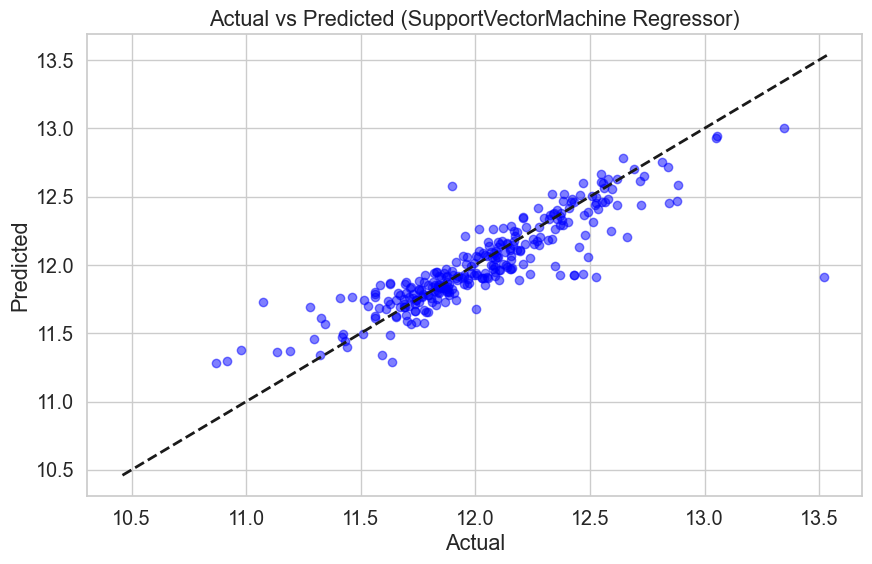

In [184]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


svr = SVR(kernel='rbf')  # You can adjust the kernel and other parameters as needed
svr.fit(x_train, y_train)

# Make predictions
y_pred_train = svr.predict(x_train)
y_pred_test = svr.predict(x_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", r2_train)
print("Test R^2 Score:", r2_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (SupportVectorMachine Regressor)')
plt.show()


Train RMSE: 0.15355818754098455
Test RMSE: 0.1973820932133556
Train R^2 Score: 0.8512354155485912
Test R^2 Score: 0.739097300186661


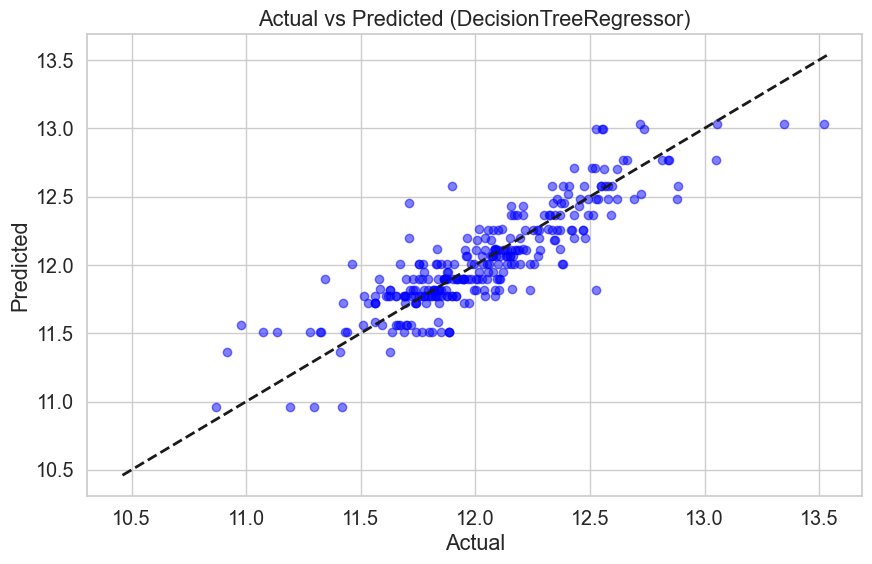

In [185]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the DecisionTreeRegressor model
dtr = DecisionTreeRegressor(max_depth=5)  # You can adjust max_depth as needed
dtr.fit(x_train, y_train)

# Make predictions
y_pred_train = dtr.predict(x_train)
y_pred_test = dtr.predict(x_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", r2_train)
print("Test R^2 Score:", r2_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (DecisionTreeRegressor)')
plt.show()

In [241]:
models_data = {
    'Model': ['LinearRegressionCrossValidation', "KNeighborsRegressor", "GradientBoostingRegressor", "XGBRegressor", "RandomForestRegressor", "IsotonicRegression Cross Validation", "Support vector machine regressor", "DecisionTreeRegressor"],
    "Train RMSE": [0.07593494987755374,0.1902630959241575, 0.07593494987755374, 0.08075804853781503, 0.17803239728148137, 0.17803239728148137, 0.07897611694141311, 0.1517016324721424],
    'Test RMSE': [0.13030737906162387, 0.2302290320604388, 0.13030737906162387, 0.12839226284838953, 0.19744490007260196, 0.19744490007260196, 0.19446701305063313, 0.2111800407155925],
     'Train R^2 Score': [0.9629834929963328, 0.7676080221650183, 0.9629834929963328, 0.9581318621269688, 0.7965254515484415, 0.7965254515484415, 0.9599591242817969, 0.8522618956347433],
     'Test R^2 Score' : [0.8937034015000501, 0.6681807914248249, 0.8937034015000501, 0.8968049052348637, 0.7559531597865148, 0.7559531597865148, 0.763259132234233, 0.720818210633368],
    'Cross-Validation RMSE': [0.27368346472795807, 'NA', 'NA', 'NA',' NA', 'NA', 0.26963621235734403, 'NA']
}

# Create a DataFrame
models_df = pd.DataFrame(models_data)

# Display the DataFrame
print(models_df)

                                 Model  Train RMSE  Test RMSE  \
0      LinearRegressionCrossValidation    0.075935   0.130307   
1                  KNeighborsRegressor    0.190263   0.230229   
2            GradientBoostingRegressor    0.075935   0.130307   
3                         XGBRegressor    0.080758   0.128392   
4                RandomForestRegressor    0.178032   0.197445   
5  IsotonicRegression Cross Validation    0.178032   0.197445   
6     Support vector machine regressor    0.078976   0.194467   
7                DecisionTreeRegressor    0.151702   0.211180   

   Train R^2 Score  Test R^2 Score Cross-Validation RMSE  
0         0.962983        0.893703              0.273683  
1         0.767608        0.668181                    NA  
2         0.962983        0.893703                    NA  
3         0.958132        0.896805                    NA  
4         0.796525        0.755953                    NA  
5         0.796525        0.755953                    NA  
6

In [ ]:
## FROM THE ABOVE DATAFRAME WE CAN SEE THAT GRADIENT BOOSTING REGRESSOR MAKES THE BEST FIT FOR THE DATA BOTH TEST AND TRAIN

In [ ]:
##fitting the model gbr to the test data and checking the predictions

In [ ]:
predictions = gbr.predict(x_test)

In [ ]:
print (predictions)

# After running all the models using different techniques it shows that the Gradient Boosting Regressor Model suits the best, to still improve the quality of the model let us do hyperparameter tuning using gradient boosting regressor¶

# HYPERPARAMETER TUNING

In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5]  # Maximum depth of the trees
}

# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV instance to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model for predictions
y_pred = best_model.predict(x_test)

# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}
Test RMSE: 0.11532655580352441


Train RMSE: 0.06817448214349052
Test RMSE: 0.11532655580352441
Train R^2 Score: 0.9706777498819038
Test R^2 Score: 0.9109319966357533


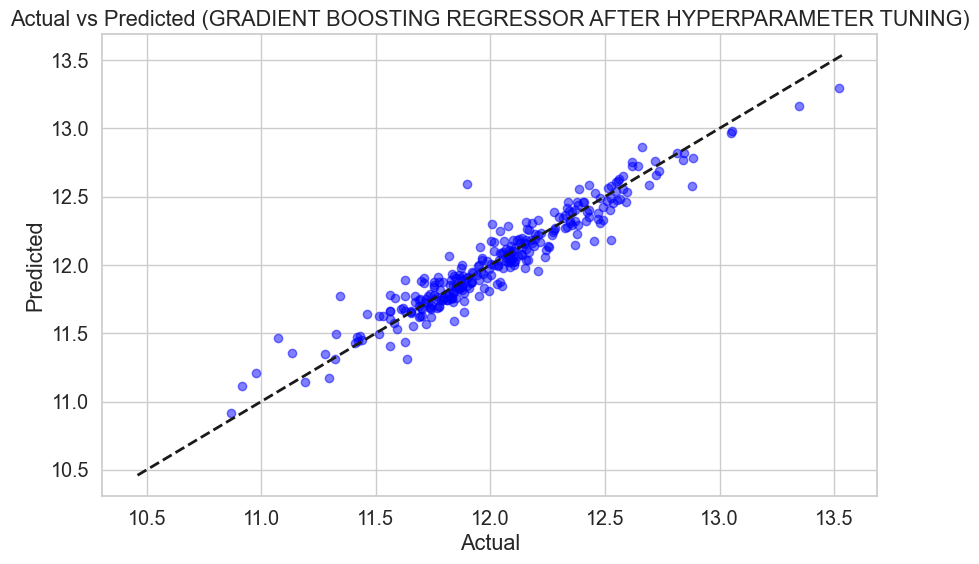

In [187]:
# Make predictions
y_pred_train = grid_search.predict(x_train)
y_pred_test = grid_search.predict(x_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", r2_train)
print("Test R^2 Score:", r2_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (GRADIENT BOOSTING REGRESSOR AFTER HYPERPARAMETER TUNING)')
plt.show()


COMPARING THE TRAIN AND TEST VALUES OF GRADIENT BOOSTING REGRESSOR BEFORE AND AFTER HYPERPARAMETER TUNING

In [188]:
gbr.fit(x_train, y_train)


y_pred_train = gbr.predict(x_train)
y_pred_test = gbr.predict(x_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train RMSE BEFORE HYPERPARAMETER TUNING:", train_rmse)
print("Test RMSE BEFORE HYPERPARAMETER TUNING::", test_rmse)
print("Train R^2 Score BEFORE HYPERPARAMETER TUNING::", r2_train)
print("Test R^2 Score BEFORE HYPERPARAMETER TUNING::", r2_test)





y_pred_train = grid_search.predict(x_train)
y_pred_test = grid_search.predict(x_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train RMSE AFTER HYPERPARAMETER TUNING:", train_rmse)
print("Test RMSE AFTER HYPERPARAMETER TUNING:", test_rmse)
print("Train R^2 Score AFTER HYPERPARAMETER TUNING:", r2_train)
print("Test R^2 Score AFTER HYPERPARAMETER TUNING:", r2_test)


Train RMSE BEFORE HYPERPARAMETER TUNING: 0.07716589283094302
Test RMSE BEFORE HYPERPARAMETER TUNING:: 0.12300377834177538
Train R^2 Score BEFORE HYPERPARAMETER TUNING:: 0.9624331855788126
Test R^2 Score BEFORE HYPERPARAMETER TUNING:: 0.8986788812258681
Train RMSE AFTER HYPERPARAMETER TUNING: 0.06817448214349052
Test RMSE AFTER HYPERPARAMETER TUNING: 0.11532655580352441
Train R^2 Score AFTER HYPERPARAMETER TUNING: 0.9706777498819038
Test R^2 Score AFTER HYPERPARAMETER TUNING: 0.9109319966357533


# Comparison of values before and after hyperparameter tuning

# The accuracy has increased to 97.06% from 96.24%

# fitting the model grid_search and printing the predictions

In [224]:
y_pred = grid_search.predict(x_test)

In [225]:
y_pred

array([12.46164929, 12.17198406, 12.14524928, 13.16332838, 11.84550604,
       12.00374833, 11.97884028, 12.2895623 , 12.62877686, 11.75009582,
       11.65069058, 11.77549063, 11.4496424 , 12.34859181, 12.57546136,
       13.2940332 , 11.88238004, 12.13272494, 11.78140044, 11.64188096,
       12.49092353, 12.15676953, 12.1603373 , 12.00212164, 12.11636211,
       11.78685151, 12.00059627, 11.83344463, 12.01905993, 12.3515354 ,
       11.99834747, 12.09759285, 11.82886793, 11.55268692, 12.22618966,
       11.72490103, 12.21721285, 11.92362239, 12.56331552, 11.57753126,
       12.22236299, 11.83090906, 12.5565937 , 12.15047861, 12.29934893,
       11.31030466, 11.657395  , 11.74583675, 11.68815478, 11.7745239 ,
       12.39208114, 11.17383785, 11.44049269, 11.65382917, 11.78710887,
       11.9756693 , 11.76279871, 12.18588319, 11.79443567, 12.24116804,
       11.84591025, 12.81795884, 11.83552979, 12.17938977, 11.87535556,
       11.6225811 , 11.82553111, 11.69852991, 11.91830611, 12.04

In [191]:
predictions = np.expm1(y_pred)
print(predictions)

[258240.19453861 193296.17643768 188196.88799396 520906.82446204
 139455.22641482 163364.99559161 159346.12565971 217413.79276522
 305215.56764263 126764.70506098 114769.59436118 130025.11913514
  93866.77262497 230634.03693172 289368.98211842 593641.87563022
 144693.52030608 185854.53247664 130795.82472461 113762.94943336
 265911.75216917 190377.51065014 191057.95050029 163099.46581877
 182838.15473851 131510.75382143 162850.86578574 137783.29044339
 165885.63839675 231313.93053634 162485.05569523 179438.40383723
 137154.13357151 104055.25285671 204063.14603414 123610.768507
 202239.49835206 150785.82873784 285875.59713641 106672.84249472
 203283.75118133 137434.37155098 283960.43066999 189183.61300679
 219551.99781065  81657.782945   115541.64914537 126225.94952205
 119150.94208806 129899.47999078 240885.49854583  71241.00295946
  93011.82735447 115130.37822238 131544.60457253 158841.63871652
 128385.26720781 196001.5967855  132511.95206819 207142.70048202
 139511.60734356 368780.217

In [213]:
submit = pd.DataFrame()

In [214]:
submit["PropPrice"] = predictions
submit.to_csv('submission.csv', index=True)  # Save to CSV without including the index

In [215]:
submit

,PropPrice
0,258240.194539
1,193296.176438
2,188196.887994
3,520906.824462
4,139455.226415
5,163364.995592
6,159346.125660
7,217413.792765
8,305215.567643
9,126764.705061


In [218]:
print(df_encod['PropPrice'].tail())


PropertyID
1456    12.072541
1457    12.254863
1458    12.493130
1459    11.864462
1460    11.901583
Name: PropPrice, dtype: float64


In [203]:
submit.shape

(290, 2)

ERROR PREDICTION OF THE MODEL

In [219]:

y_true = [11.901583]  # Ground truth values
y_pred = [11.90970012]  # Predicted values


# Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE
r2 = r2_score(y_true, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 0.008117119999999645
Mean Squared Error: 6.588763709439424e-05
Root Mean Squared Error: 0.008117119999999645
R-squared (R2) Score: nan


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


compare predictions to true labels to evaluate the model

In [228]:
np. array (y_test)

array([12.41044104, 12.06104687, 12.36734079, 13.34550693, 12.04941884,
       12.00150548, 12.05466819, 12.38421883, 12.56024446, 11.69107165,
       11.65268741, 11.95053503, 11.44035477, 12.4292162 , 12.88029182,
       13.5211395 , 11.69524702, 12.13725833, 11.56076279, 11.46163217,
       12.47609978, 12.18075484, 12.14950229, 12.03171926, 12.06681058,
       11.73606902, 12.01370075, 11.97035031, 12.07823927, 12.29778545,
       11.87756858, 12.08953883, 11.90496755, 11.66177641, 12.19551713,
       11.66992921, 12.26904744, 11.94145585, 12.51318963, 11.58058411,
       12.20607265, 11.8493977 , 12.5776362 , 12.14950229, 12.00762171,
       11.6351431 , 11.88448902, 11.80931948, 11.73606902, 11.62625415,
       12.34346657, 11.29601246, 11.42409425, 11.65268741, 11.80559508,
       11.87059991, 11.83428406, 12.12269104, 11.88448902, 12.27373129,
       11.89818787, 12.8139179 , 11.75194237, 12.15477935, 11.79433792,
       11.53076538, 11.86358234, 11.77528973, 11.84141593, 12.07

In [226]:
y_pred

array([12.46164929, 12.17198406, 12.14524928, 13.16332838, 11.84550604,
       12.00374833, 11.97884028, 12.2895623 , 12.62877686, 11.75009582,
       11.65069058, 11.77549063, 11.4496424 , 12.34859181, 12.57546136,
       13.2940332 , 11.88238004, 12.13272494, 11.78140044, 11.64188096,
       12.49092353, 12.15676953, 12.1603373 , 12.00212164, 12.11636211,
       11.78685151, 12.00059627, 11.83344463, 12.01905993, 12.3515354 ,
       11.99834747, 12.09759285, 11.82886793, 11.55268692, 12.22618966,
       11.72490103, 12.21721285, 11.92362239, 12.56331552, 11.57753126,
       12.22236299, 11.83090906, 12.5565937 , 12.15047861, 12.29934893,
       11.31030466, 11.657395  , 11.74583675, 11.68815478, 11.7745239 ,
       12.39208114, 11.17383785, 11.44049269, 11.65382917, 11.78710887,
       11.9756693 , 11.76279871, 12.18588319, 11.79443567, 12.24116804,
       11.84591025, 12.81795884, 11.83552979, 12.17938977, 11.87535556,
       11.6225811 , 11.82553111, 11.69852991, 11.91830611, 12.04